## 서울특별시 공공자전거 외국인 대여정보(월별) 데이터 전처리

In [566]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [501]:
# os.listdir('./')

In [502]:
data3 = pd.read_excel('서울특별시 공공자전거 외국인 대여정보(월별)_2020.06.xlsx')
data1 = pd.read_excel('서울특별시 공공자전거 외국인 대여정보(월별)_201901_201911.xlsx')
data4 = pd.read_excel('서울특별시 공공자전거 외국인 대여정보(월별)_2020.07_2021.01.xlsx')
data2 = pd.read_excel('서울특별시 공공자전거 외국인 대여정보(월별)_2019.12_2020.05.xlsx')

In [503]:
full_data = pd.concat([data1, data2, data3, data4]).sort_values(by='일시')

In [504]:
full_data['f_rent_loc_num'] = full_data.대여소.str.split('.').str[0]
full_data['f_rent_loc_name'] = full_data.대여소.str.split('.').str[1]

In [505]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 0 to 2315
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   일시               15327 non-null  int64 
 1   대여소              15327 non-null  object
 2   대여건수             15327 non-null  int64 
 3   반납건수             15327 non-null  int64 
 4   f_rent_loc_num   15327 non-null  object
 5   f_rent_loc_name  15325 non-null  object
dtypes: int64(3), object(3)
memory usage: 838.2+ KB


In [506]:
full_data.columns = ['f_rent_YM', 'f_rent_loc_numname','f_rent_cnt','f_return_cnt', 'f_rent_loc_num', 'f_rent_loc_name' ]

In [507]:
full_data[['f_rent_YM', 'f_rent_cnt','f_return_cnt', 'f_rent_loc_num', 'f_rent_loc_name' ]]

,f_rent_YM,f_rent_cnt,f_return_cnt,f_rent_loc_num,f_rent_loc_name
0,201901,1,1,1009,천호역4번출구(현대백화점)
123,201901,25,29,344,성균관대 E하우스 앞
124,201901,13,13,346,맥스타일 앞
125,201901,8,5,347,동대문역사문화공원역 9번출구 앞
126,201901,2,2,348,독립문역 사거리
...,...,...,...,...,...
2228,202101,1,1,2322,삼성역 3번 출구
2227,202101,0,1,2320,도곡역 대치지구대 방향
2226,202101,0,1,2308,압구정파출소 앞
2224,202101,0,1,2303,논현역 7번출구


In [508]:
full_data['f_rent_YM'] = full_data['f_rent_YM'].astype('str')

In [509]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 0 to 2315
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   f_rent_YM           15327 non-null  object
 1   f_rent_loc_numname  15327 non-null  object
 2   f_rent_cnt          15327 non-null  int64 
 3   f_return_cnt        15327 non-null  int64 
 4   f_rent_loc_num      15327 non-null  object
 5   f_rent_loc_name     15325 non-null  object
dtypes: int64(2), object(4)
memory usage: 838.2+ KB


In [510]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 0 to 2315
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   f_rent_YM           15327 non-null  object
 1   f_rent_loc_numname  15327 non-null  object
 2   f_rent_cnt          15327 non-null  int64 
 3   f_return_cnt        15327 non-null  int64 
 4   f_rent_loc_num      15327 non-null  object
 5   f_rent_loc_name     15325 non-null  object
dtypes: int64(2), object(4)
memory usage: 838.2+ KB


In [511]:
full_data[ full_data['f_rent_loc_name'].isnull() == True ]

,f_rent_YM,f_rent_loc_numname,f_rent_cnt,f_return_cnt,f_rent_loc_num,f_rent_loc_name
1467,201904,상암센터 정비실,0,1,상암센터 정비실,NaN
493,202007,위트콤,1,0,위트콤,NaN


In [512]:
full_data.loc[full_data['f_rent_loc_num'] == '위트콤','f_rent_loc_name'] = '위트콤'
full_data.loc[full_data['f_rent_loc_num'] == '상암센터 정비실','f_rent_loc_name'] = '상암센터 정비실'

In [513]:
full_data.loc[full_data['f_rent_loc_name'] == '위트콤','f_rent_loc_num'] = 0
full_data.loc[full_data['f_rent_loc_name'] == '상암센터 정비실','f_rent_loc_num'] = 0

In [514]:
full_data['f_rent_loc_num'] = full_data['f_rent_loc_num'].astype(int)

In [515]:
full_data.describe()

,f_rent_cnt,f_return_cnt,f_rent_loc_num
count,15327.000000,15327.000000,15327.000000
mean,3.526391,3.488354,1139.523847
std,6.402019,6.675636,1668.187893
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,352.000000
50%,2.000000,1.000000,811.000000
75%,4.000000,4.000000,1976.000000
max,143.000000,157.000000,99999.000000


In [516]:
full_data['f_rent_Y'] = full_data.f_rent_YM.str[0:4]
full_data['f_rent_M'] = full_data.f_rent_YM.str[4:]

In [517]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 0 to 2315
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   f_rent_YM           15327 non-null  object
 1   f_rent_loc_numname  15327 non-null  object
 2   f_rent_cnt          15327 non-null  int64 
 3   f_return_cnt        15327 non-null  int64 
 4   f_rent_loc_num      15327 non-null  int32 
 5   f_rent_loc_name     15327 non-null  object
 6   f_rent_Y            15327 non-null  object
 7   f_rent_M            15327 non-null  object
dtypes: int32(1), int64(2), object(5)
memory usage: 1017.8+ KB


In [518]:
full_data[['f_rent_YM','f_rent_Y','f_rent_M', 'f_rent_cnt','f_return_cnt', 'f_rent_loc_num', 'f_rent_loc_name' ]].to_csv('FOREIGN_MONTH_RENT_HIST.csv', encoding='utf8')

---------------------------------------------------------

## 서울특별시 공공자전거 외국인 대여정보(일별) 데이터 전처리

In [519]:
os.listdir('./')

['.ipynb_checkpoints',
 'FOREIGN_DAY_RENT_HIST.csv',
 'FOREIGN_DAY_RENT_HIST.csv.csv',
 'FOREIGN_MONTH_RENT_HIST.csv',
 'TOTAL_DAY_RENT_HIST.csv',
 'Untitled.ipynb',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2019.12_2020.05.csv',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2019.12_2020.05.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(월별)_201901_201911.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2020.06.csv',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2020.06.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2020.07_2021.01.csv',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2020.07_2021.01.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2019.12.01_2020.05.31.csv',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2019.12.01_2020.05.31.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(일별)_20190101_20191130.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2020.06.01_2020.06.30.csv',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2020.06.01_2020.06.30.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2020.07.01_2021.01.31.csv',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2020.07.01_2021.01.31.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(일별)_통합.csv',
 '서울특별시 공공자전거 일별 대여건수(2019.4_5).xlsx',
 '서울특별시 공공자전거 일별 대여건수_2019.12.01_2020.05.31.c

In [520]:
data2 = pd.read_excel('서울특별시 공공자전거 외국인 대여정보(일별)_2019.12.01_2020.05.31.xlsx')
data1 = pd.read_excel('서울특별시 공공자전거 외국인 대여정보(일별)_20190101_20191130.xlsx')
data3 = pd.read_excel('서울특별시 공공자전거 외국인 대여정보(일별)_2020.06.01_2020.06.30.xlsx')
data4 = pd.read_excel('서울특별시 공공자전거 외국인 대여정보(일별)_2020.07.01_2021.01.31.xlsx')

In [521]:
full_data = pd.concat([data1, data2, data3, data4])

In [522]:
full_data['f_rent_loc_num'] = full_data.대여소.str.split('.').str[0]
full_data['f_rent_loc_name'] = full_data.대여소.str.split('.').str[1]

In [523]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52852 entries, 0 to 4581
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   일시               52852 non-null  datetime64[ns]
 1   대여소              52852 non-null  object        
 2   대여건수             52852 non-null  int64         
 3   반납건수             52852 non-null  int64         
 4   f_rent_loc_num   52852 non-null  object        
 5   f_rent_loc_name  52850 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.8+ MB


In [524]:
# full_data[['f_rent_YMD', 'f_rent_cnt','f_return_cnt', 'f_rent_loc_num', 'f_rent_loc_name' ]]
full_data.columns = ['f_rent_YMD', 'f_rent_loc_numname', 'f_rent_cnt', 'f_return_cnt', 'f_rent_loc_num', 'f_rent_loc_name']

In [525]:
full_data

,f_rent_YMD,f_rent_loc_numname,f_rent_cnt,f_return_cnt,f_rent_loc_num,f_rent_loc_name
0,2019-01-01,113. 홍대입구역 2번출구 앞,2,0,113,홍대입구역 2번출구 앞
1,2019-01-01,2505. 우성아파트사거리 (기업은행앞),2,0,2505,우성아파트사거리 (기업은행앞)
2,2019-01-01,2622. 올림픽공원역 3번출구,1,1,2622,올림픽공원역 3번출구
3,2019-01-01,314. 국립현대미술관,3,2,314,국립현대미술관
4,2019-01-01,315. 신한은행 안국역지점 옆,0,2,315,신한은행 안국역지점 옆
...,...,...,...,...,...,...
4577,2021-01-31,4791. 명동역9번 출구,1,1,4791,명동역9번 출구
4578,2021-01-31,583. 청계천 생태교실 앞,3,3,583,청계천 생태교실 앞
4579,2021-01-31,2320. 도곡역 대치지구대 방향,0,1,2320,도곡역 대치지구대 방향
4580,2021-01-31,2342. 대청역 1번출구 뒤,1,0,2342,대청역 1번출구 뒤


In [526]:
weekday_list = []
for i in full_data.f_rent_YMD:
    weekday_list.append(i.weekday())
#weekday_list

In [527]:
full_data['f_rent_weekday'] = weekday_list

In [528]:
full_data['f_rent_YMD'] = full_data['f_rent_YMD'].astype('str') 

In [529]:
full_data['f_rent_Y'] = full_data.f_rent_YMD.str.split('-').str[0]
full_data['f_rent_M'] = full_data.f_rent_YMD.str.split('-').str[1]
full_data['f_rent_D'] = full_data.f_rent_YMD.str.split('-').str[2]

In [530]:
full_data.loc[full_data['f_rent_loc_num'] == '위트콤','f_rent_loc_name'] = '위트콤'
full_data.loc[full_data['f_rent_loc_num'] == '상암센터 정비실','f_rent_loc_name'] = '상암센터 정비실'

In [531]:
full_data.loc[full_data['f_rent_loc_name'] == '위트콤','f_rent_loc_num'] = 0
full_data.loc[full_data['f_rent_loc_name'] == '상암센터 정비실','f_rent_loc_num'] = 0

In [532]:
full_data

,f_rent_YMD,f_rent_loc_numname,f_rent_cnt,f_return_cnt,f_rent_loc_num,f_rent_loc_name,f_rent_weekday,f_rent_Y,f_rent_M,f_rent_D
0,2019-01-01,113. 홍대입구역 2번출구 앞,2,0,113,홍대입구역 2번출구 앞,1,2019,01,01
1,2019-01-01,2505. 우성아파트사거리 (기업은행앞),2,0,2505,우성아파트사거리 (기업은행앞),1,2019,01,01
2,2019-01-01,2622. 올림픽공원역 3번출구,1,1,2622,올림픽공원역 3번출구,1,2019,01,01
3,2019-01-01,314. 국립현대미술관,3,2,314,국립현대미술관,1,2019,01,01
4,2019-01-01,315. 신한은행 안국역지점 옆,0,2,315,신한은행 안국역지점 옆,1,2019,01,01
...,...,...,...,...,...,...,...,...,...,...
4577,2021-01-31,4791. 명동역9번 출구,1,1,4791,명동역9번 출구,6,2021,01,31
4578,2021-01-31,583. 청계천 생태교실 앞,3,3,583,청계천 생태교실 앞,6,2021,01,31
4579,2021-01-31,2320. 도곡역 대치지구대 방향,0,1,2320,도곡역 대치지구대 방향,6,2021,01,31
4580,2021-01-31,2342. 대청역 1번출구 뒤,1,0,2342,대청역 1번출구 뒤,6,2021,01,31


In [572]:
full_data[['f_rent_YMD','f_rent_Y','f_rent_M','f_rent_D','f_rent_weekday', 'f_rent_cnt','f_return_cnt', 'f_rent_loc_num', 'f_rent_loc_name' ]].to_csv('FOREIGN_DAY_RENT_HIST.csv', encoding='utf8')

In [534]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52852 entries, 0 to 4581
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   f_rent_YMD          52852 non-null  object
 1   f_rent_loc_numname  52852 non-null  object
 2   f_rent_cnt          52852 non-null  int64 
 3   f_return_cnt        52852 non-null  int64 
 4   f_rent_loc_num      52852 non-null  object
 5   f_rent_loc_name     52852 non-null  object
 6   f_rent_weekday      52852 non-null  int64 
 7   f_rent_Y            52852 non-null  object
 8   f_rent_M            52852 non-null  object
 9   f_rent_D            52852 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.4+ MB


---------------------------------------------------------------------------------------

## 서울특별시 공공자전거 일별 대여건수 데이터 전처리

In [90]:
os.listdir('./')

['.ipynb_checkpoints',
 'Untitled.ipynb',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2019.12_2020.05.csv',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2019.12_2020.05.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(월별)_201901_201911.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2020.06.csv',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2020.06.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2020.07_2021.01.csv',
 '서울특별시 공공자전거 외국인 대여정보(월별)_2020.07_2021.01.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(월별)_통합.csv',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2019.12.01_2020.05.31.csv',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2019.12.01_2020.05.31.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(일별)_20190101_20191130.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2020.06.01_2020.06.30.csv',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2020.06.01_2020.06.30.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2020.07.01_2021.01.31.csv',
 '서울특별시 공공자전거 외국인 대여정보(일별)_2020.07.01_2021.01.31.xlsx',
 '서울특별시 공공자전거 외국인 대여정보(일별)_통합.csv',
 '서울특별시 공공자전거 일별 대여건수(2019.4_5).xlsx',
 '서울특별시 공공자전거 일별 대여건수_2019.12.01_2020.05.31.csv',
 '서울특별시 공공자전거 일별 대여건수_2019.12.01_2020.05.31.xlsx',
 '서울특별시 공공자전거 일별 대여건수_20190601_2

In [97]:
data1 =pd.read_excel('서울특별시_공공자전거 일별 대여건수_(2018_2019.03).xlsx')
data2 =pd.read_excel('서울특별시 공공자전거 일별 대여건수(2019.4_5).xlsx')
data3 =pd.read_excel('서울특별시 공공자전거 일별 대여건수_20190601_20191130.xlsx')
data4 =pd.read_excel('서울특별시 공공자전거 일별 대여건수_2019.12.01_2020.05.31.xlsx')
data5 =pd.read_excel('서울특별시 공공자전거 일별 대여건수_2020.06.01_2020.06.30.xlsx')
data6 =pd.read_excel('서울특별시 공공자전거 일별 대여건수_2020.07.01_2021.01.31.xlsx')

In [110]:
data1.columns = ['대여일시','대여건수']
data2.columns = ['대여일시','대여건수']

In [112]:
full_data = pd.concat([data1, data2, data3, data4, data5, data6])

In [117]:
full_data.columns = ['t_rent_YMD','t_rent_cnt']
full_data

,t_rent_YMD,t_rent_cnt
0,2018-01-01,4950
1,2018-01-02,7136
2,2018-01-03,7156
3,2018-01-04,7102
4,2018-01-05,7705
...,...,...
210,2021-01-27,45639
211,2021-01-28,22745
212,2021-01-29,24435
213,2021-01-30,28379


In [118]:
full_data.to_csv('서울특별시 공공자전거 일별 대여건수_통합.csv' ,encoding='utf8')

## 데이터 EDA

In [573]:
data1 = pd.read_csv('FOREIGN_DAY_RENT_HIST.csv')
#data2 = pd.read_csv('FOREIGN_MONTH_RENT_HIST.csv')

In [574]:
data1

,Unnamed: 0,f_rent_YMD,f_rent_Y,f_rent_M,f_rent_D,f_rent_weekday,f_rent_cnt,f_return_cnt,f_rent_loc_num,f_rent_loc_name
0,0,2019-01-01,2019,1,1,1,2,0,113,홍대입구역 2번출구 앞
1,1,2019-01-01,2019,1,1,1,2,0,2505,우성아파트사거리 (기업은행앞)
2,2,2019-01-01,2019,1,1,1,1,1,2622,올림픽공원역 3번출구
3,3,2019-01-01,2019,1,1,1,3,2,314,국립현대미술관
4,4,2019-01-01,2019,1,1,1,0,2,315,신한은행 안국역지점 옆
...,...,...,...,...,...,...,...,...,...,...
52847,4577,2021-01-31,2021,1,31,6,1,1,4791,명동역9번 출구
52848,4578,2021-01-31,2021,1,31,6,3,3,583,청계천 생태교실 앞
52849,4579,2021-01-31,2021,1,31,6,0,1,2320,도곡역 대치지구대 방향
52850,4580,2021-01-31,2021,1,31,6,1,0,2342,대청역 1번출구 뒤


In [575]:
data1.info()
data1 = data1.set_index('f_rent_YMD')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52852 entries, 0 to 52851
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       52852 non-null  int64 
 1   f_rent_YMD       52852 non-null  object
 2   f_rent_Y         52852 non-null  int64 
 3   f_rent_M         52852 non-null  int64 
 4   f_rent_D         52852 non-null  int64 
 5   f_rent_weekday   52852 non-null  int64 
 6   f_rent_cnt       52852 non-null  int64 
 7   f_return_cnt     52852 non-null  int64 
 8   f_rent_loc_num   52852 non-null  int64 
 9   f_rent_loc_name  52852 non-null  object
dtypes: int64(8), object(2)
memory usage: 4.0+ MB


In [576]:
# data1 = data1.set_index('f_rent_YM')
data1_2019 = data1['2019-01-01':'2019-12-31']
data1_2020 = data1['2020-01-01':'2020-12-31']
data1_2021 = data1['2021-01-01':]

In [577]:
# # data2 = data2.set_index('f_rent_YMD')
# data2_2019 = data2[201901:]
# data2_2020 = data2[202001:202012]
# data2_2021 = data2[202101:]

Text(2019-12-01, 300000, '2019-12-01')

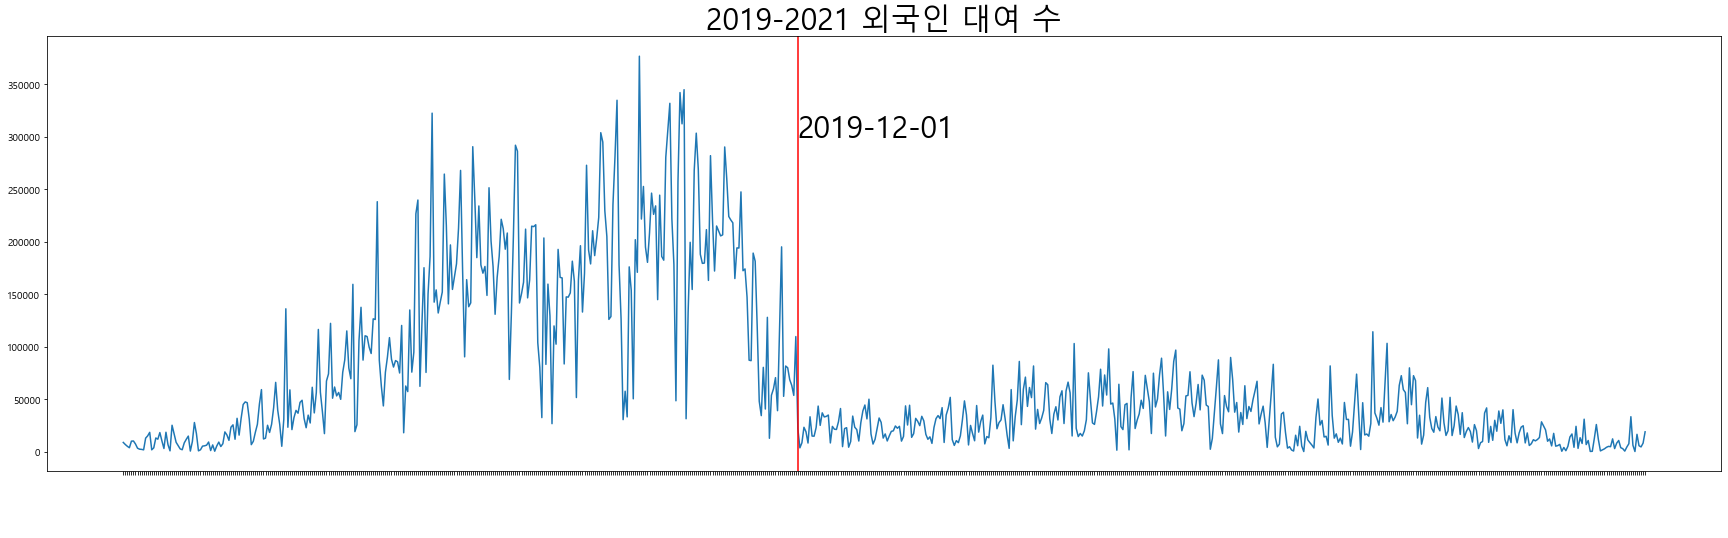

In [578]:
#전체 기간
plt.figure(figsize=(30,8))
plt.title('2019-2021 외국인 대여 수',fontsize=30)
plt.xticks(rotation =90, color='w')
plt.plot(data1.groupby(by='f_rent_YMD').sum()['f_rent_loc_num'].index,data1.groupby(by='f_rent_YMD').sum()['f_rent_loc_num'])
plt.axvline('2019-12-01',color='r')
plt.text('2019-12-01',300000, '2019-12-01',fontsize=30)

In [588]:
#코로나 기간 분리
data1['2019-11-29':]
# corona_before = data1['2019-12-01':]


KeyError: "Cannot get left slice bound for non-unique label: '2019-11-29'"

In [579]:
#2020년
# plt.figure(figsize=(30,8))
# plt.xticks(rotation =90)
# plt.plot(data1_2019.groupby(by='f_rent_YM').sum()['f_rent_loc_num'].index,data1_2019.groupby(by='f_rent_YM').sum()['f_rent_loc_num'])

In [580]:
#2020년
# plt.figure(figsize=(30,8))
# plt.xticks(rotation =90)
# plt.plot(data1_2020.groupby(by='f_rent_YM').sum()['f_rent_loc_num'].index,data1_2020.groupby(by='f_rent_YM').sum()['f_rent_loc_num'])

In [581]:
#2021년
# plt.figure(figsize=(10,8))
# plt.xticks(rotation =90)
# plt.plot(data1_2021.groupby(by='f_rent_YM').sum()['f_rent_loc_num'].index,data1_2021.groupby(by='f_rent_YM').sum()['f_rent_loc_num'])

In [217]:
data1.groupby('f_rent_loc_name').sum()[['f_rent_cnt']].sort_values(by='f_rent_cnt')

,f_rent_cnt
f_rent_loc_name,
성북제일새마을금고 본점 앞,0
중앙동 동진빌딩,0
중랑구청 사거리,0
정릉교회 앞,0
구 서부경찰서 건너편,0
...,...
홍대입구역 8번출구 앞,609
서울숲 관리사무소,698
뚝섬유원지역 1번출구 앞,763


In [219]:
data1.groupby('f_rent_loc_name').sum()[['f_return_cnt']].sort_values(by='f_return_cnt')

,f_return_cnt
f_rent_loc_name,
강동구청 앞,0
홍은센트레빌 아파트 앞,0
홈플러스 금천점 앞,0
보라매역4번출구,0
해공도서관앞,0
...,...
홍대입구역 8번출구 앞,662
뚝섬유원지역 1번출구 앞,787
"고속터미널역 8-1번, 8-2번 출구 사이",828


In [ ]:
plt.figure(figsize=(30,8))
plt.xticks(rotation =90)
plt.plot(data1_2020.groupby(by='f_rent_YM').sum()['f_rent_loc_num'].index,data1_2020.groupby(by='f_rent_YM').sum()['f_rent_loc_num'])

In [210]:
# plt.figure(figsize=(30,8))
# plt.xticks(rotation =90)
# plt.plot(data2_2021.groupby(by='f_rent_YM').sum()['f_rent_loc_num'].index,data2_2021.groupby(by='f_rent_YM').sum()['f_rent_loc_num'])

In [ ]:
날씨 데이터 
이용현황
